In [62]:
%pip install pandas
%pip install tabula-py
%pip install rdflib
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
import os
import tabula
import pandas as pd
import rdflib
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot


directory = 'data/uk'

pdf_files = [f for f in os.listdir(directory) if f.endswith('.pdf')]

for pdf_file in pdf_files:
    file_path = os.path.join(directory, pdf_file)
    tabula.convert_into(file_path, f"{directory}/{pdf_file}.csv", output_format="csv", pages='all')
    print(f"Converted {pdf_file} to csv")

Converted ufo_report_2009.pdf to csv


In [64]:
us = pd.read_csv('data/us_ufo_sightings.csv')
us.head(10)

,date_time,city_area,state,country,ufo_shape,encounter_length,described_encounter_length,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.294722,-82.984167


In [65]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])
uk.head()

,Date,Time,Town / Village,Area,Occupation\r(Where Relevant),Description
0,Jan-09,Not Given,Warwick,Warwickshire,Air Traffic Control\remployee,An orange glowing object with a red light on t...
1,Jan-09,Not Given,Not Given,North Yorkshire,NaN,"Very curious. A very bright light, four times ..."
2,Jan-09,Not Given,Carterton,Oxfordshire,Air Traffic Control\remployee,A very bright constant red light.
3,Jan-09,Not Given,High Wycombe,Buckinghamshire,NaN,been outside the individuals house for some ni...
4,Jan-09,Not Given,Sawtry,Cambridgeshire,NaN,A UFO.


In [66]:

uk = pd.concat([pd.read_csv(f"{directory}/{f}") for f in os.listdir(directory) if f.endswith('.csv')])

graph = rdflib.Graph()

# Add uk to graph with columns Date / Time /Area/ Description
for index, row in uk.head(10).iterrows():
    subject = rdflib.URIRef(f"https://example.com/uk/ufo_sighting/{index}")
    graph.add((subject, rdflib.RDF.type, rdflib.URIRef("https://example.com/uk/ufo_sighting")))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/date"), rdflib.Literal(row['Date'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/time"), rdflib.Literal(row['Time'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/area"), rdflib.Literal(row['Area'])))
    graph.add((subject, rdflib.URIRef("https://example.com/uk/description"), rdflib.Literal(row['Description'])))
print(graph.serialize(format='turtle'))
# uk.head()



@prefix ns1: <https://example.com/uk/> .

<https://example.com/uk/ufo_sighting/0> a ns1:ufo_sighting ;
    ns1:area "Warwickshire" ;
    ns1:date "Jan-09" ;
    ns1:description "An orange glowing object with a red light on the right-hand side." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/1> a ns1:ufo_sighting ;
    ns1:area "North Yorkshire" ;
    ns1:date "Jan-09" ;
    ns1:description "Very curious. A very bright light, four times that of a star." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/2> a ns1:ufo_sighting ;
    ns1:area "Oxfordshire" ;
    ns1:date "Jan-09" ;
    ns1:description "A very bright constant red light." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/3> a ns1:ufo_sighting ;
    ns1:area "Buckinghamshire" ;
    ns1:date "Jan-09" ;
    ns1:description "been outside the individuals house for some nights and then one\rnight." ;
    ns1:time "Not Given" .

<https://example.com/uk/ufo_sighting/4> a ns1:ufo_s

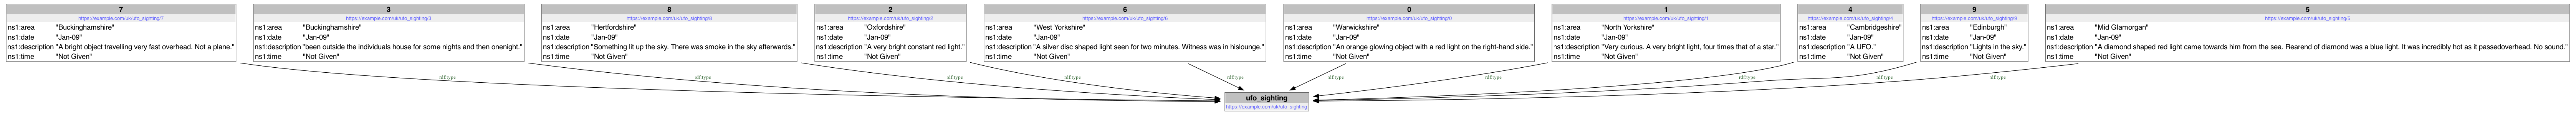

In [67]:
stream = io.StringIO()
rdf2dot(graph, stream, opts = {display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))